---
---

<h1><center><ins>Numerical methods: exam 2</ins></center></h1>
<h2><center>4th of of February, 9:45-11:15<br><br>

---
---

## Exercise 1 (9 points) - The leapfrog algorithm:

Imagine that someone dropped a ball which is now falling on the ground from the height of 100 meters. 

**(A)** Create the set of ODEs for the distance travelled and the velocity of the ball. Initial conditions: the height $h = 100$ meters, the initial velocity is zero. The acceleration of the free fall is $a$.

**(B)** Solve this coupled set of ODEs with **your own leapfrog** implementation. Use the following step size: $\Delta t = 0.1$ seconds. Include a check if the ball has hit the ground.

**(C)** Plot the numerical solution for $a = 3.7$ meters/second (the freefall acceleration on Mars). Calculate and output the time at the step when the altitude becomes zero (the ball has hit the ground).

## Exercise 2 (9 points) - FFT:

Fast Fourrier Transform can be used to search for radial velocity signals of exoplanets and to determine their periods. The file ```rv_hd69830_like.csv``` provides a mock radial velocity signal similar to the real RV signal of the star HD 69830 by HARPS on the ESO 3.6m telescope at La Silla.

**(A)** Load the datafile into your programme. Ignore the caption when creating numpy arrays.

**(B)** Using **embedded python functions** from the numpy library, search for periodic signals in this datafile. Before performing FFT, subtract the mean value from the signal to aviod contamination. **NB**: on a noisy dataset and without additional processing, the real frequecies can be displayed as several very close frequencies.

**(C)** Plot the power spectrum of the mock data.

Gefundene Peak-Frequenzen [1/day]: [0.11333 0.03   ]
Gefundene Perioden [day]:          [ 8.8235 33.3333]


IndexError: index 600 is out of bounds for axis 0 with size 600

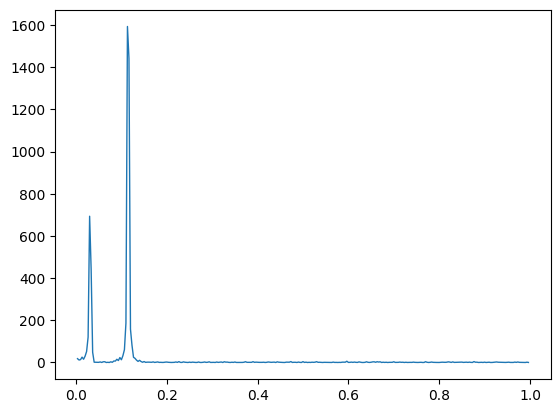

In [ ]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks


filename= 'rv_hd69830_like.csv'
csv= pd.read_csv (filename )     # load CSV

td= csv['time_days'].to_numpy()  # convert 1st column to numpy array
rv= csv['rv_ms'].to_numpy()      # convert 2nd column to numpy array

N= rv.size                       # number of elements
dt= td[1]-td[0]                  # Δt needs to be constant for all samples

mean= rv.mean()                  # calculate mean of 2nd column
rv-= mean                        # subtract mean

w= np.fft.fft( rv )
freq= np.fft.fftfreq( N, d=dt )


# Periodogram/PSD (einseitig)
psd = (dt / N) * (np.abs(w)**2)             # zweiseitig skaliert
psd[1:-1] *= 2.0                            # einseitig: *2 (außer DC/Nyquist)

m = freq > 0
peaks, props = find_peaks(psd[m], prominence=np.max(psd[m]) * 0.02)

f_peaks = freq[m][peaks]
P_peaks = 1.0 / f_peaks

# Sortiert nach Leistung (größte zuerst)
order = np.argsort(psd[m][peaks])[::-1]
f_peaks = f_peaks[order]
P_peaks = P_peaks[order]

print("Gefundene Peak-Frequenzen [1/day]:", np.round(f_peaks, 5))
print("Gefundene Perioden [day]:         ", np.round(P_peaks, 4))


plt.figure()
plt.plot(freq[m], psd[m], lw=1)
plt.scatter(f_peaks, psd[np.searchsorted(freq, f_peaks)], zorder=3)
plt.xlabel("Frequency [1/day]")
plt.ylabel("One-sided PSD")
plt.title("PSD + peaks")
plt.tight_layout()
plt.show()

